In [1]:
import matplotlib.pyplot as plt
import my_functions as mf
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
%load_ext autoreload
%autoreload 1
%aimport my_functions

In [40]:
# Getting the dataframe
df = pd.read_csv('clean_data.csv')

In [41]:
df.head()

,Unnamed: 0,OrderID,OrderDate,RequiredDate,ItemCount,OrderTotal,WeightedDiscount,CustomerId,CustomerCompany,CustomerCity,...,EmployeeSuper,Discount,OrderTotalLog,ItemCountLog,OrderTotalSqrt,ItemCountSqrt,OrderTotalCbrt,ItemCountCbrt,OrderTotal4rt,ItemCount4rt
0,0,10248,2012-07-04,2012-08-01,27,440.00,0.000000,VINET,Vins et alcools Chevalier,Reims,...,2.0,0.00,6.086775,3.295837,20.976177,5.196152,7.605905,3.000000,4.579976,2.279507
1,1,10249,2012-07-05,2012-08-16,49,1863.40,0.000000,TOMSP,Toms Spezialitäten,Münster,...,5.0,0.00,7.530158,3.891820,43.167117,7.000000,12.305578,3.659306,6.570169,2.645751
2,2,10250,2012-07-08,2012-08-05,60,1552.60,0.125000,HANAR,Hanari Carnes,Rio de Janeiro,...,2.0,0.10,7.347686,4.094345,39.403046,7.745967,11.579413,3.914868,6.277185,2.783158
3,3,10251,2012-07-08,2012-08-05,41,654.06,0.025610,VICTE,Victuailles en stock,Lyon,...,2.0,0.05,6.483199,3.713572,25.574597,6.403124,8.680389,3.448217,5.057133,2.530440
4,4,10252,2012-07-09,2012-08-06,105,3597.90,0.030952,SUPRD,Suprêmes délices,Charleroi,...,2.0,0.05,8.188106,4.653960,59.982497,10.246951,15.323208,4.717694,7.744837,3.201086


In [43]:
# I am going to make a new feature to see how the average cost per item in the cart might change
df['CostPerItem'] = df['OrderTotal'] / df['ItemCount']

In [46]:
groups = []
for name, group in df.groupby('Discount').CostPerItem:
    groups.append(group)

In [47]:
stats.kruskal(groups[0],groups[1],groups[2],groups[3],groups[4],groups[5])

KruskalResult(statistic=23.21945080760673, pvalue=0.00030646554320374074)

In [48]:
import scikit_posthocs as sp

In [49]:
sp.posthoc_dunn(df, val_col='CostPerItem', 
                group_col='Discount', 
                #p_adjust='bonferroni'
               )

,0.00,0.05,0.10,0.15,0.20,0.25
0.00,-1.000000,0.951980,0.057302,0.077958,0.000270,0.005633
0.05,0.951980,-1.000000,0.104326,0.111808,0.001131,0.010211
0.10,0.057302,0.104326,-1.000000,0.843859,0.070937,0.176018
0.15,0.077958,0.111808,0.843859,-1.000000,0.148671,0.276175
0.20,0.000270,0.001131,0.070937,0.148671,-1.000000,0.847768
0.25,0.005633,0.010211,0.176018,0.276175,0.847768,-1.000000


Grouping DataFrame by Discount
Target Features: CostPerItem


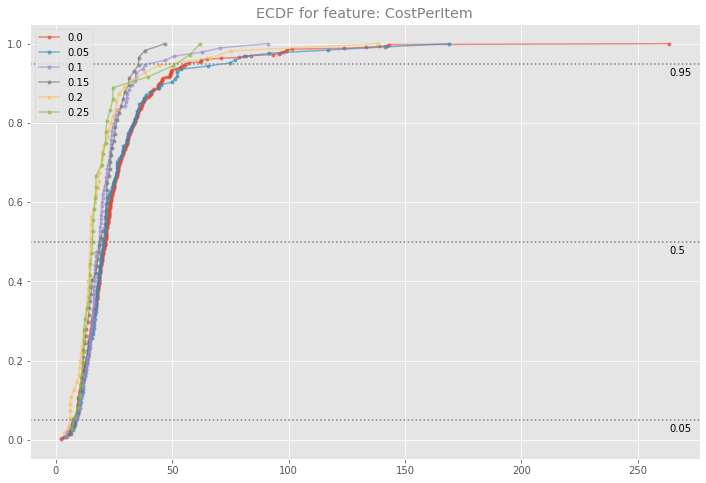

Side by side comparison of all group distributions:


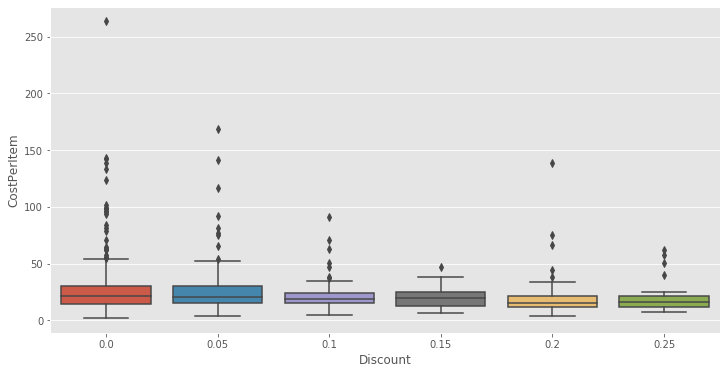

In [51]:
mf.ecdf(df, group_by='Discount', targets='CostPerItem')
fig, ax = plt.subplots(figsize=(12,6))
print("Side by side comparison of all group distributions:")
sns.boxplot(x=df.Discount, y=df.CostPerItem)
plt.show()

Variable: CostPerItem
Normality Test Results for ['CostPerItem']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 CostPerItem 
 Statistic 
 0.99703 
 6.255194e-01 
 
 
 p-value 
 0.00000 
 1.895891e-38 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 CostPerItem 
 68.995757 
 0.783

count    801.000000
mean      24.727682
std       20.973669
min        2.000000
25%       14.164706
50%       19.644444
75%       27.652174
max      263.500000
Name: CostPerItem, dtype: float64

Skew: 4.415187650825373


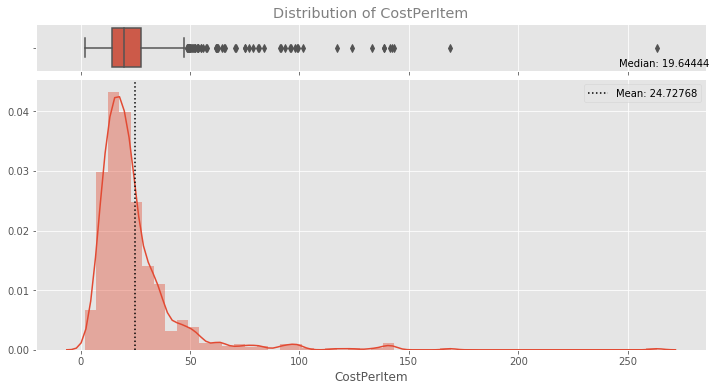

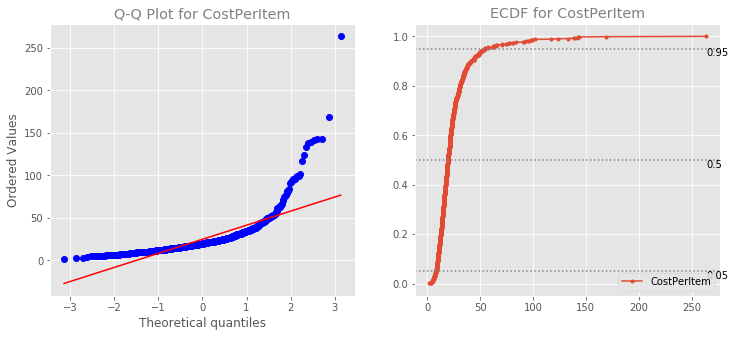

In [52]:
mf.visualize_distribution(df, ['CostPerItem']);

Variable: CostPerItemLog
Normality Test Results for ['CostPerItemLog']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 CostPerItemLog 
 Statistic 
 0.946785 
 9.795936e-01 
 
 
 p-value 
 0.000000 
 3.879279e-09 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 CostPerItemLog 
 3.934431 
 0.783

count    801.000000
mean       3.005443
std        0.600764
min        0.693147
25%        2.650753
50%        2.977795
75%        3.319704
max        5.574053
Name: CostPerItemLog, dtype: float64

Skew: 0.39448244899241613


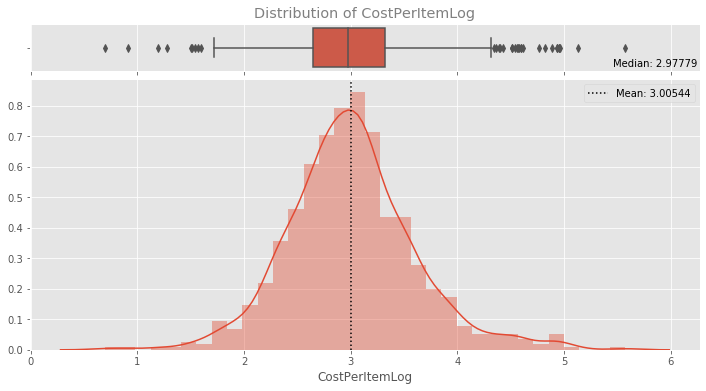

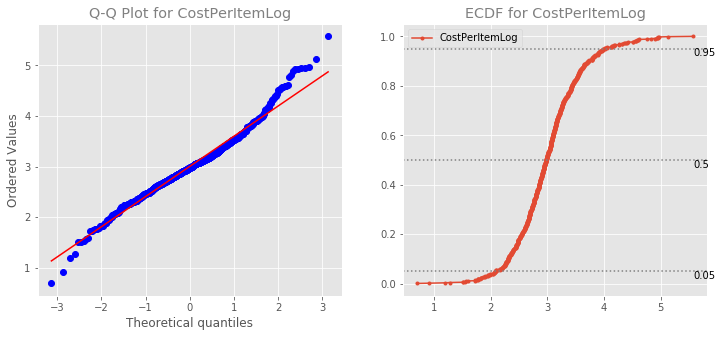

In [53]:
# I would like to transform the variable to be more normal, I will start with a log
df['CostPerItemLog'] = np.log(df.CostPerItem)
mf.visualize_distribution(df, ['CostPerItemLog']);

In [54]:
# This made the data much more normal but leaves some large outliers
# I believe these outliers are probably due to circumstances which involved a customer
# only restocking on less or more expensive items, so they should be removed for comparison
tukey_df = mf.tukey_trim(df, 'CostPerItemLog')

Length of old DataFrame: 801
Length of Tukey trimmed DataFrame 768


Variable: CostPerItemLog
Normality Test Results for ['CostPerItemLog']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 CostPerItemLog 
 Statistic 
 0.95786 
 0.996555 
 
 
 p-value 
 0.00000 
 0.094675 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 CostPerItemLog 
 0.436166 
 0.783

count    768.000000
mean       2.972167
std        0.497572
min        1.722767
25%        2.652477
50%        2.967049
75%        3.275821
max        4.319688
Name: CostPerItemLog, dtype: float64

Skew: 0.07325228807738741


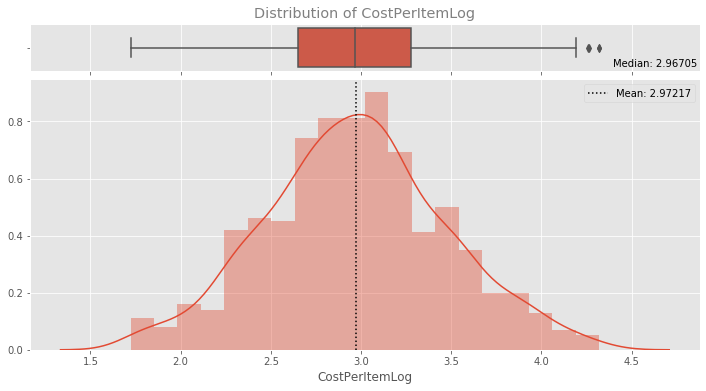

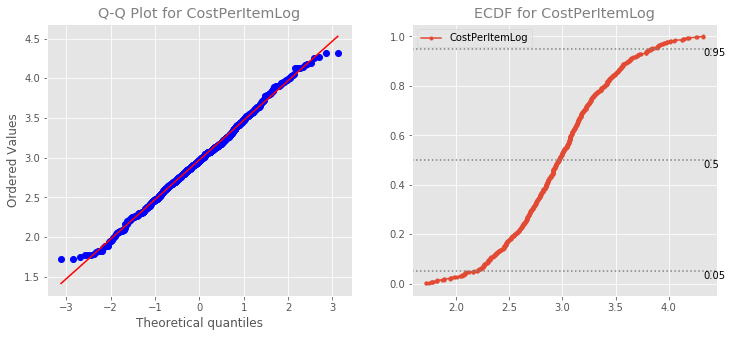

In [56]:
mf.visualize_distribution(tukey_df, ['CostPerItemLog'])

Side by side comparison of all group distributions:


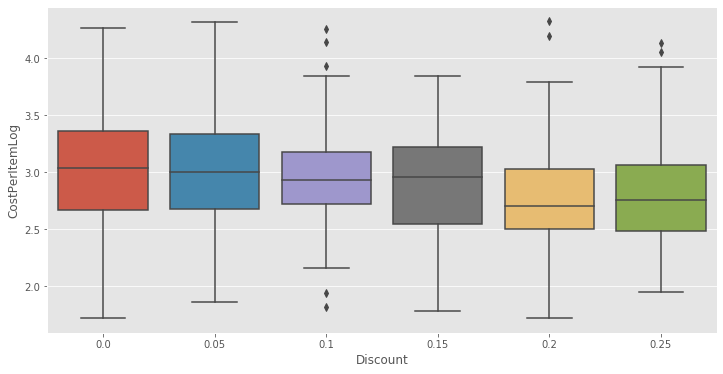

In [62]:
mf.make_boxplot(tukey_df, 'Discount', 'CostPerItemLog')

Linear Regression for CostPerItemLog~WeightedDiscount


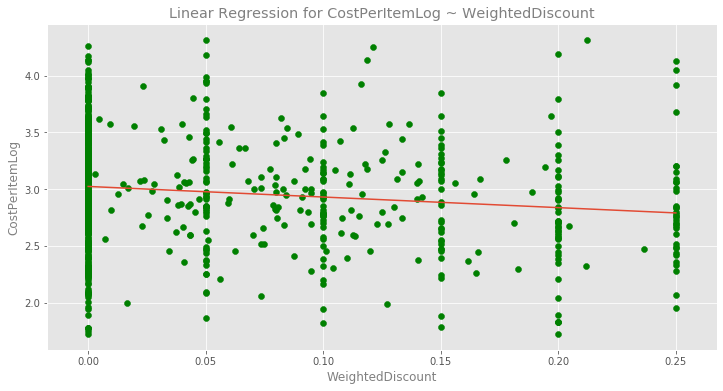

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CostPerItemLog   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     15.93
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           7.20e-05
Time:                        16:18:05   Log-Likelihood:                -545.27
No. Observations:                 768   AIC:                             1095.
Df Residuals:                     766   BIC:                             1104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0237      0.022    137.575      0.000       2.981       3.067
WeightedDiscount    -0.9344      0.234     -3.991      0.000      -1.394      -0.475
==============================================================================
Omnibus:                        0.771   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.772
Skew:                           0.077   Prob(JB):                        0.680
Kurtosis:                       2.979   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test for homoscedasticity of residuals:


,F_statistic,p_value
Goldfeld-Quandt,0.996912,0.511433


Normality Test Results for ['residuals']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residuals 
 Statistic 
 1.682485e-01 
 0.997287 
 
 
 p-value 
 1.792757e-19 
 0.233367 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residuals 
 0.477071 
 0.783

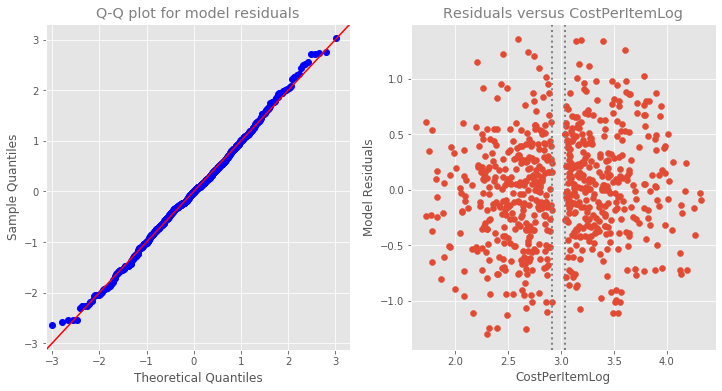

In [64]:
# 
lm = mf.do_a_linreg(tukey_df, 'WeightedDiscount', 'CostPerItemLog')

We can see that the model parameter is statistically significant, and that the assumptions of the model are met based on the tests for normality and homoscedasticity of residuals. Thus, we can say with 95% confidence that there is a negative linear relationship between WeightedDiscount of and order, and the average amount spent on items within that order. This is intuitive, but important to consider, since charging less for your items can reduce profit.